In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [12]:
df = pd.read_csv('../datasets/fitness_dataset.csv')
df.isnull().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

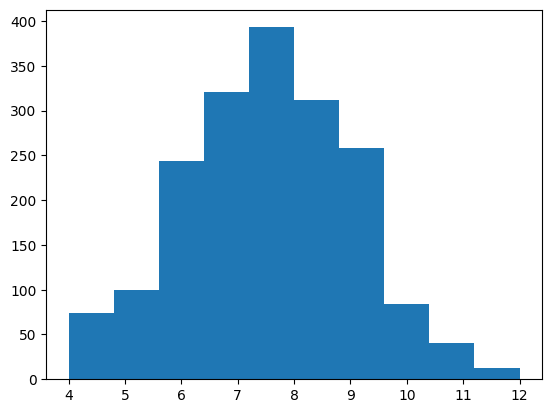

In [13]:
import matplotlib.pyplot as plt

# plt.figure=(figesize=(12,6))
plt.hist(df['sleep_hours'])
plt.show()

In [14]:
df['sleep_hours'] = df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [15]:
df.isnull().sum()

age                  0
height_cm            0
weight_kg            0
heart_rate           0
blood_pressure       0
sleep_hours          0
nutrition_quality    0
activity_index       0
smokes               0
gender               0
is_fit               0
dtype: int64

In [16]:
df

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,7.513315,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.000000,9.95,4.83,yes,F,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,52,173,98,60.7,106.1,7.513315,1.54,3.25,1,M,1
1996,61,186,74,51.4,123.8,9.400000,8.63,3.15,no,M,1
1997,77,198,89,76.7,103.6,8.300000,1.98,3.36,yes,M,0
1998,62,190,63,80.7,115.9,6.700000,9.21,2.39,1,F,0


In [17]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

#nettoyage de la colonne 'smokes'
df['smokes'] = df['smokes'].astype(str)

#dictionnaire de remplacement
#car lorsqu'on fait directement l'encodage avec labelEncoder il donne 4 valeurs 0/1/2/3 
map_smokes = {
    'yes': 1,
    'no': 0,
    '1': 1,
    '0': 0
}

# On applique le mapping
df['smokes'] = df['smokes'].map(map_smokes)

#Encodage de 'gender'
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [18]:
#Définition X et y
y = df['is_fit']
X = df.drop(columns=['is_fit'])

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#modele
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2,random_state=42)
clf.fit(X_train, y_train)

#evaluation
pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
print(f"precision: {precision_score(y_test, pred):.4f}")
print(f"f1_score: {f1_score(y_test, pred):.4f}")
print(f"recall: {recall_score(y_test, pred):.4f}")

Accuracy: 0.7325
precision: 0.7164
f1_score: 0.6421
recall: 0.5818


In [37]:
import joblib
joblib.dump(clf, 'decision_tree_classification.pkl')

['decision_tree_classification.pkl']